In [15]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [16]:
df = pd.read_csv("D:/semestr_10/master_thesis/medical_chatbot/data/text_data.csv")

In [17]:
df_help = df.drop(['severity_score','severity_grade'], axis=1)
print(len(df_help.columns))

72


In [18]:
X = df.drop(['severity_score','severity_grade'], axis=1)
y = df['severity_grade']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
len(X.columns)

158

In [20]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': BernoulliNB(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

for name, score in results.items():
    print(f"{name}: {score:.4f}")

d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: 0.8846
Logistic Regression: 0.9231
KNN: 0.5000
SVM: 0.5385
Gradient Boosting: 0.8462
Naive Bayes: 0.8462


In [21]:
for name, model in models.items():
    cross_val_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} cross-validation scores: {cross_val_scores}")
    print(f"{name} average cross-validation score: {cross_val_scores.mean():.4f}")

Random Forest cross-validation scores: [0.61538462 0.88461538 0.76923077 0.80769231 0.69230769]
Random Forest average cross-validation score: 0.7538


d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Logistic Regression cross-validation scores: [0.65384615 0.92307692 0.65384615 0.65384615 0.80769231]
Logistic Regression average cross-validation score: 0.7385
KNN cross-validation scores: [0.5        0.53846154 0.42307692 0.46153846 0.46153846]
KNN average cross-validation score: 0.4769
SVM cross-validation scores: [0.38461538 0.34615385 0.34615385 0.46153846 0.42307692]
SVM average cross-validation score: 0.3923
Gradient Boosting cross-validation scores: [0.57692308 0.92307692 0.65384615 0.80769231 0.76923077]
Gradient Boosting average cross-validation score: 0.7462
Naive Bayes cross-validation scores: [0.61538462 0.92307692 0.84615385 0.92307692 0.80769231]
Naive Bayes average cross-validation score: 0.8231


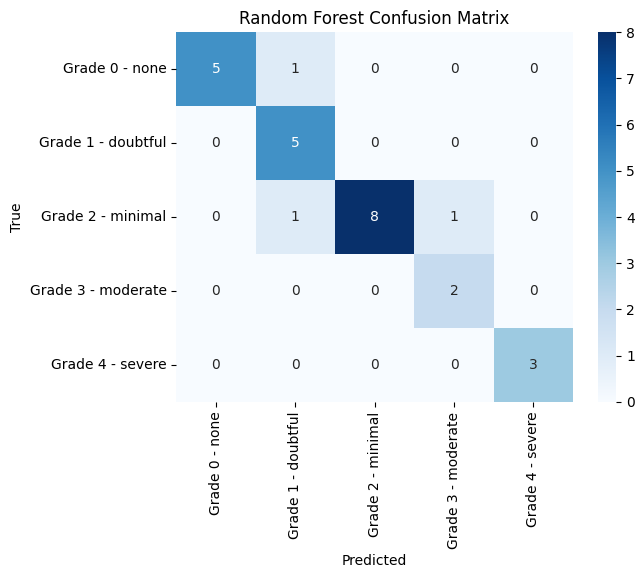

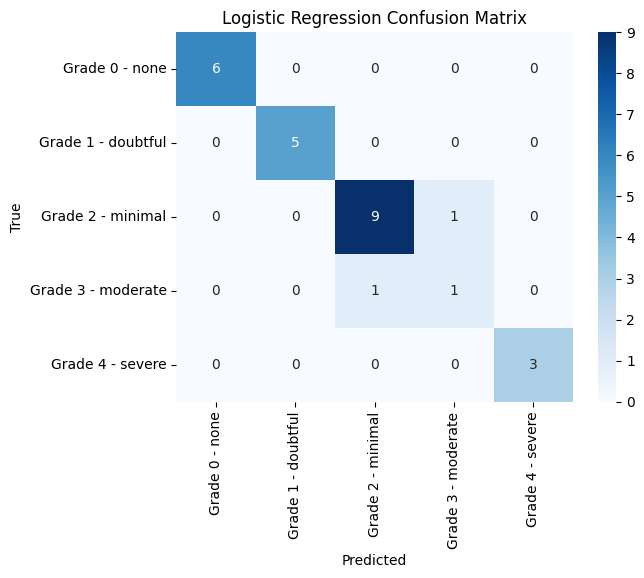

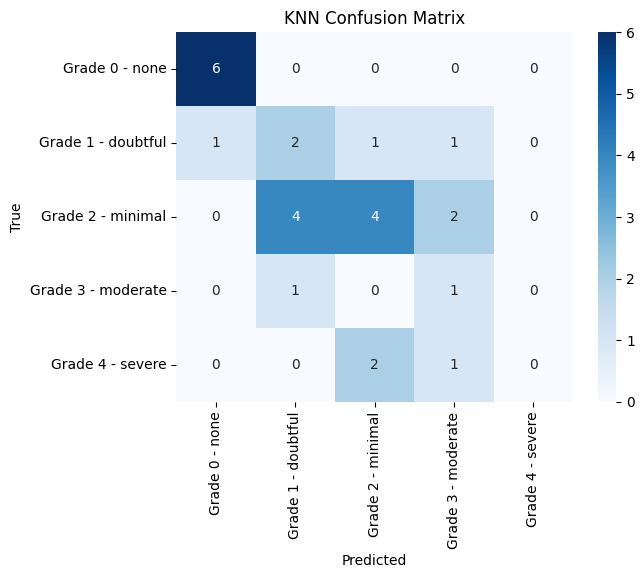

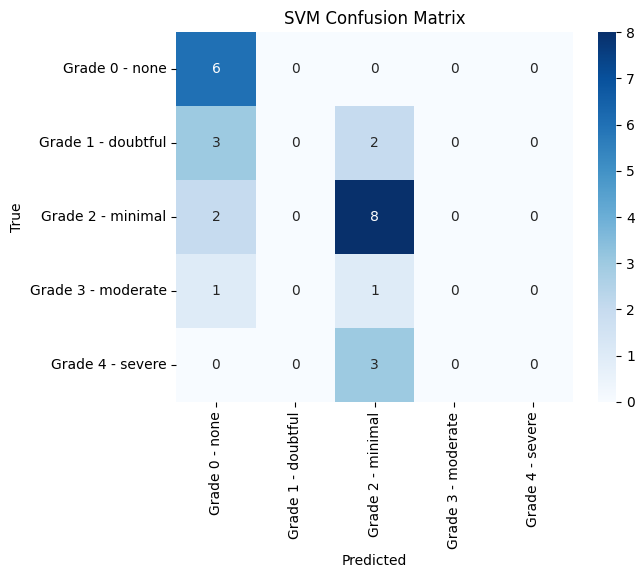

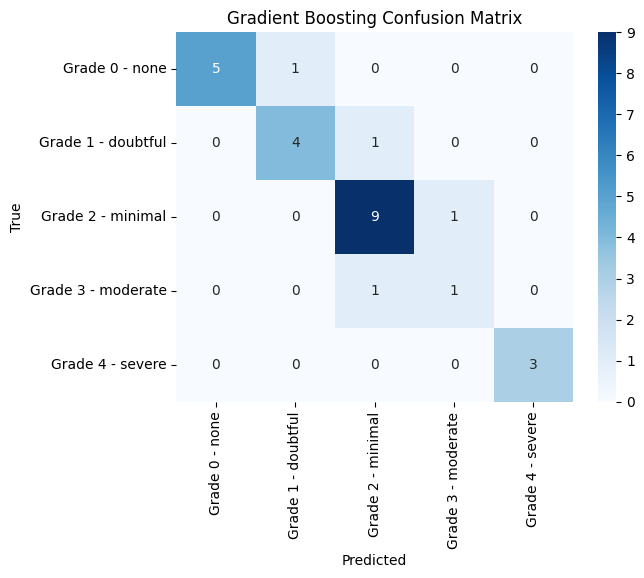

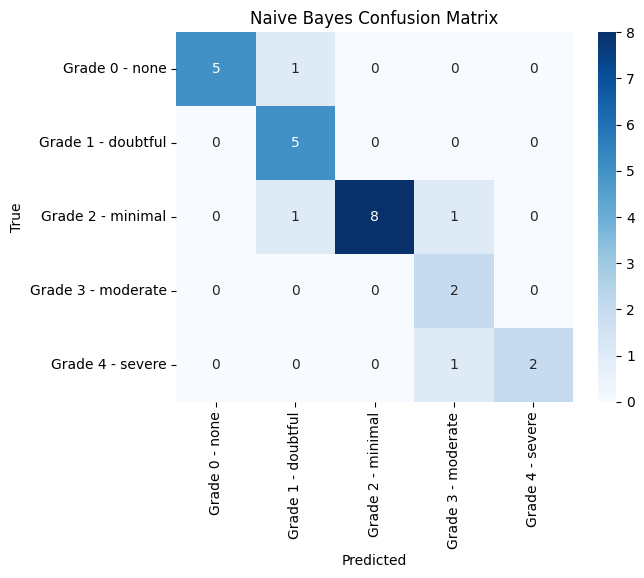

In [22]:
for name, model in models.items():

    conf_matrix = confusion_matrix(y_test, model.predict(X_test))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = {}

for name, model in models.items():
    scores[name] = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'{name} average score is: { scores[name]}.')

Random Forest average score is: [0.84615385 0.76923077 0.69230769 0.76923077 0.76923077 0.76923077
 0.76923077 0.76923077 1.         0.53846154 0.92307692 0.92307692
 0.84615385 0.84615385 0.69230769 0.76923077 0.69230769 0.84615385
 0.69230769 0.61538462 0.76923077 0.76923077 0.92307692 0.92307692
 0.84615385 0.69230769 0.84615385 0.92307692 0.84615385 0.76923077].


d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\semestr_10\master_thesis\medical_chatbot\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Logistic Regression average score is: [0.69230769 0.76923077 0.76923077 0.84615385 0.69230769 0.61538462
 0.69230769 0.84615385 0.76923077 0.76923077 0.84615385 0.84615385
 0.84615385 0.69230769 0.69230769 0.69230769 0.76923077 0.69230769
 0.69230769 0.61538462 0.76923077 0.61538462 0.84615385 0.76923077
 0.76923077 0.76923077 0.84615385 1.         0.84615385 0.69230769].
KNN average score is: [0.46153846 0.69230769 0.53846154 0.53846154 0.61538462 0.38461538
 0.30769231 0.38461538 0.53846154 0.46153846 0.61538462 0.15384615
 0.69230769 0.46153846 0.30769231 0.46153846 0.38461538 0.53846154
 0.46153846 0.61538462 0.46153846 0.53846154 0.38461538 0.53846154
 0.46153846 0.53846154 0.76923077 0.46153846 0.53846154 0.23076923].
SVM average score is: [0.53846154 0.46153846 0.38461538 0.15384615 0.38461538 0.30769231
 0.23076923 0.46153846 0.46153846 0.46153846 0.53846154 0.38461538
 0.30769231 0.46153846 0.23076923 0.23076923 0.38461538 0.46153846
 0.46153846 0.61538462 0.53846154 0.4615384

In [24]:
for name, _ in models.items():
    avg_score = np.average(scores[name])
    # print(f"Average score for {name} is {avg_score}")

    print(f"{name} model achieved: %0.2f accuracy with a standard deviation of %0.2f" % (scores[name].mean(), scores[name].std()))

Random Forest model achieved: 0.79 accuracy with a standard deviation of 0.10
Logistic Regression model achieved: 0.76 accuracy with a standard deviation of 0.09
KNN model achieved: 0.48 accuracy with a standard deviation of 0.13
SVM model achieved: 0.39 accuracy with a standard deviation of 0.11
Gradient Boosting model achieved: 0.76 accuracy with a standard deviation of 0.10
Naive Bayes model achieved: 0.84 accuracy with a standard deviation of 0.11


In [25]:
best_model_name = ""
avg_score = 0

for name, _ in models.items():
    model_score = scores[name].mean()
    if model_score > avg_score:
        avg_score = model_score
        best_model_name = name

In [26]:
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy: {scores[best_model_name].mean():.4f}")

Best Model: Naive Bayes with accuracy: 0.8359


In [27]:
print(type(best_model))

<class 'sklearn.naive_bayes.BernoulliNB'>


In [28]:
# joblib.dump(best_model, 'models/best_model_nlp.pkl')